## 哈希表

### 四数相加

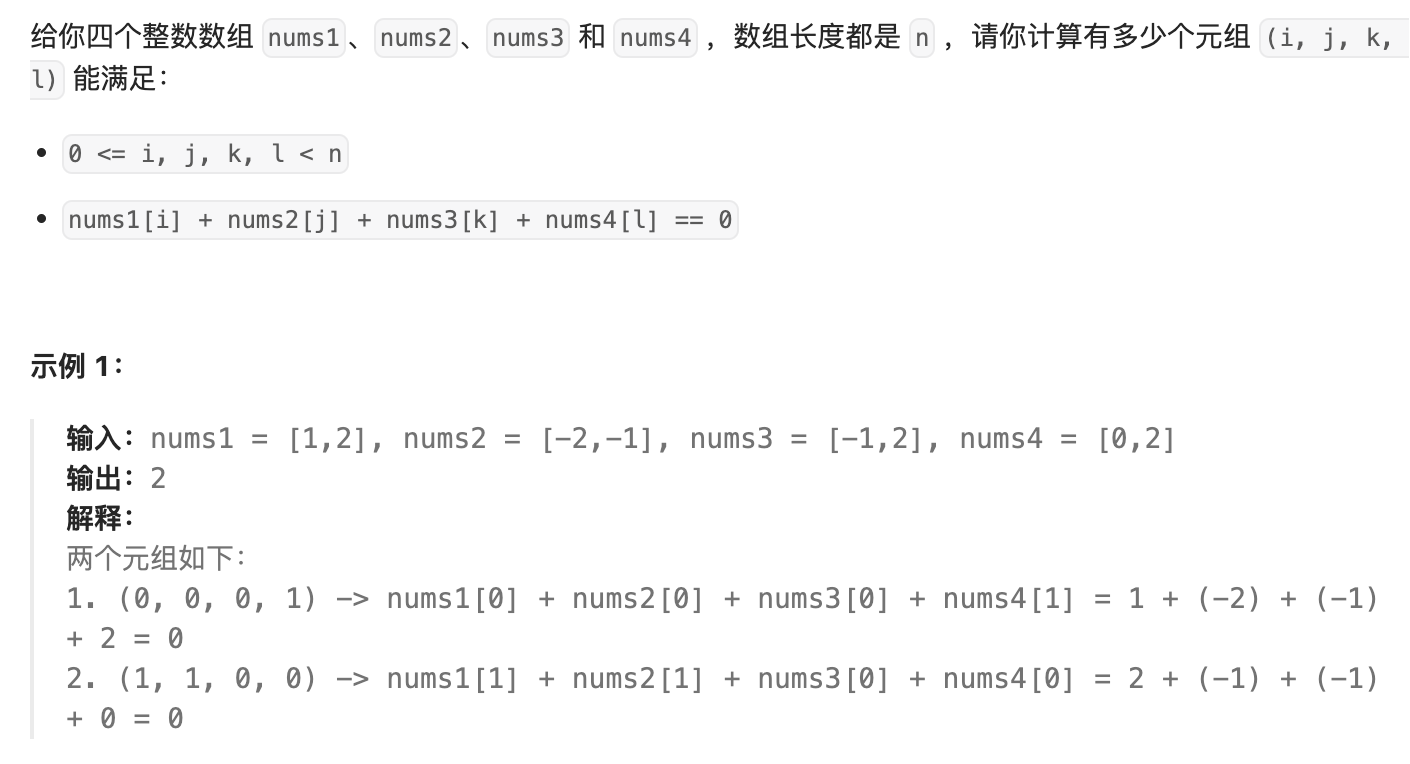

思路：可以看成两数之和 

In [ ]:
class Solution(object):
    def fourSumCount(self, nums1, nums2, nums3, nums4):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :type nums3: List[int]
        :type nums4: List[int]
        :rtype: int
        """
        hashmap = dict()

        for i in nums1:
            for j in nums2:
                if i + j in hashmap:
                    hashmap[i+j] += 1
                else:
                    hashmap[i+j] = 1

        count = 0
        for i in nums3:
            for j in nums4:
                if -(i+j) in hashmap:
                    count += hashmap[-(i+j)]
        return count


        
        

### 赎金信

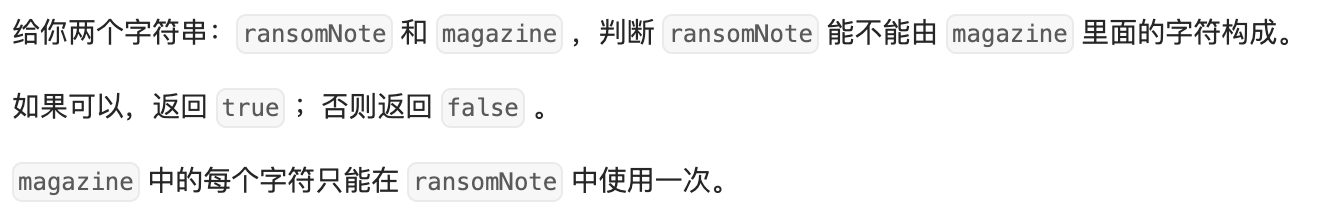

思路：可以看作判断字符是否出现在集合当中，利用哈希函数效率最高。 和字母异位符思路一致

In [ ]:
class Solution(object):
    def canConstruct(self, ransomNote, magazine):
        """
        :type ransomNote: str
        :type magazine: str
        :rtype: bool
        """
        letter = [0] * 26
        for i in magazine:
            letter[ord(i) - ord('a')] += 1

        for i in ransomNote:
            letter[ord(i) - ord('a')] -= 1
            a = letter[ord(i) - ord('a')]
            if a < 0:
                return False
        return True

        

### 三数之和（重点）

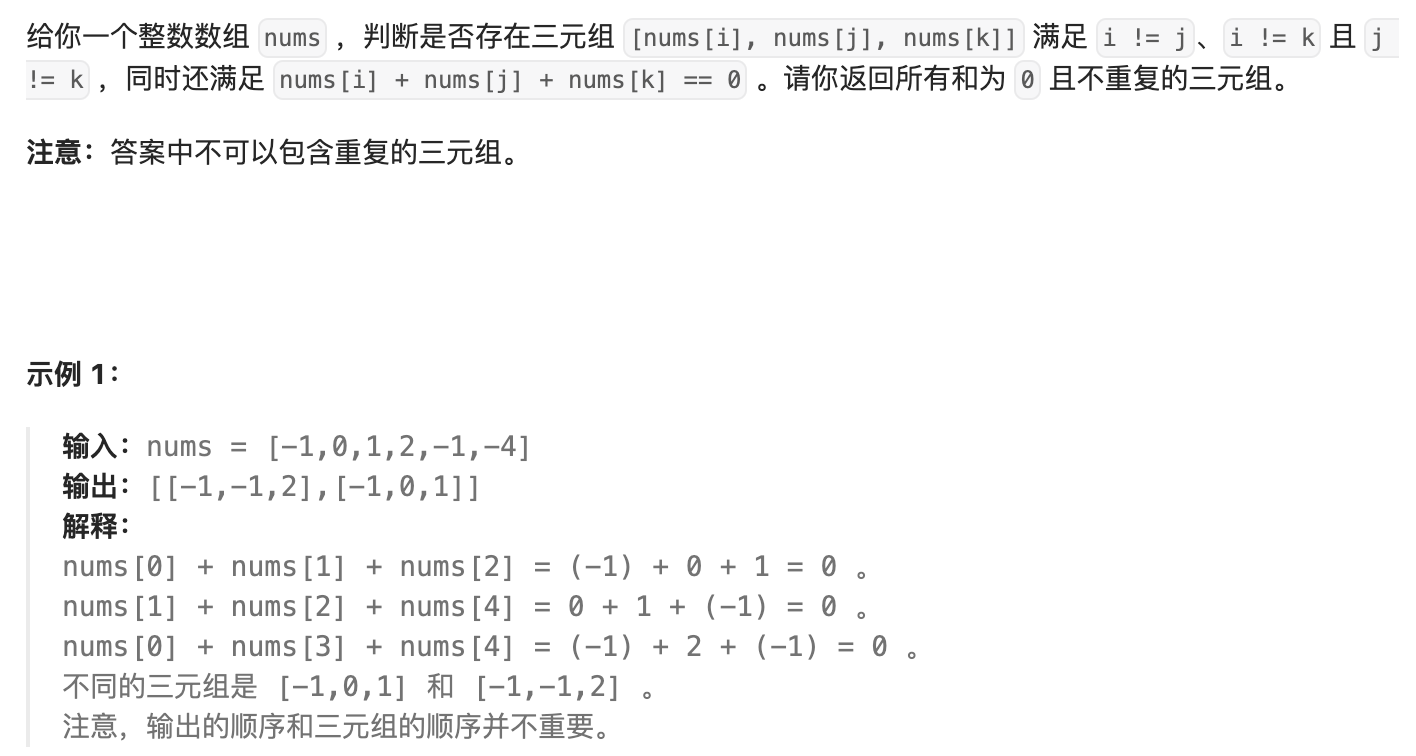

思路：如果用哈希费时 利用双指针嵌套一层for循环

注意：跳过相同元素重复（容易漏）

In [ ]:
class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        nums = sorted(nums)
        result = []

        for i in range(len(nums)):
            if nums[i] > 0:
                return result

            if i > 0 and nums[i] == nums[i - 1]:
                continue

            left = i + 1
            right = len(nums) - 1
            while right > left:
                if nums[i] + nums[left] + nums[right] > 0:
                    right -= 1
                elif nums[i] + nums[left] + nums[right] < 0:
                    left += 1
                else:
                    result.append([nums[i], nums[left], nums[right]])

                    while right > left and nums[right] == nums[right-1]:
                        right -= 1
                    while right > left and nums[left] == nums[left+1]:
                        left += 1
                    
                    right -= 1
                    left += 1
        return result
            
        

### 四数之和

思路：和三数之和一样 但是得判断是否重复

In [ ]:
class Solution:
    def fourSum(self, nums, target):
        nums.sort()
        n = len(nums)
        result = []
        for i in range(n):
            if nums[i] > target and nums[i] > 0 and target > 0:# 剪枝（可省）
                break
            if i > 0 and nums[i] == nums[i-1]:# 去重
                continue
            for j in range(i+1, n):
                if nums[i] + nums[j] > target and target > 0: #剪枝（可省）
                    break
                if j > i+1 and nums[j] == nums[j-1]: # 去重
                    continue
                left, right = j+1, n-1
                while left < right:
                    s = nums[i] + nums[j] + nums[left] + nums[right]
                    if s == target:
                        result.append([nums[i], nums[j], nums[left], nums[right]])
                        while left < right and nums[left] == nums[left+1]:
                            left += 1
                        while left < right and nums[right] == nums[right-1]:
                            right -= 1
                        left += 1
                        right -= 1
                    elif s < target:
                        left += 1
                    else:
                        right -= 1
        return result
